# Epidemic spread over the flights network

David Diener (19-733-179)
Kevin Kindler (15-922-529)
Layla Husselman (17-733-130)
Rafael Dubach (18-755-140)


https://ipywidgets.readthedocs.io/en/stable/

https://networks.skewed.de/net/openflights 

In [15]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import collections
from IPython.display import Image

In [43]:
edges = pd.read_csv('edges.csv',sep=',')
nodes = pd.read_csv('nodes.csv',sep=',')
print(edges.head())

   # source   target    distance  airline  airline_code   codeshare  \
0         0        2  124.520121       CG          1308           0   
1         0        3  157.150822       CG          1308           0   
2         0        1  106.747399       CG          1308           0   
3         0        4  424.726096       CG          1308           0   
4         0        4  424.726096       PX           328           0   

     equipment   stops  
0      DH8 DHT       0  
1          DH8       0  
2          DH8       0  
3          DH8       0  
4  DH4 DH8 DH3       0  


In [92]:
g = nx.DiGraph()
g.add_nodes_from(nodes['# index'])

#g.add_edges_from(edges['# source'],edges['target'], bipartite=0)

for a,b in edges.iterrows():
    if g.has_edge(b['# source'], b[' target']):
        g[b['# source']][b[' target']]['weight'] += 1
    else:
        g.add_edge(b['# source'], b[' target'], weight=1)
    #g.add_edges_from([(b['# source'], b[' target'])])
    #g.add_weighted_edges_from([(b['# source'], b[' target'], b[' weight'])])

In [107]:
g[4][0]["weight"]
g.get_edge_data(4,0)

{'weight': 2}

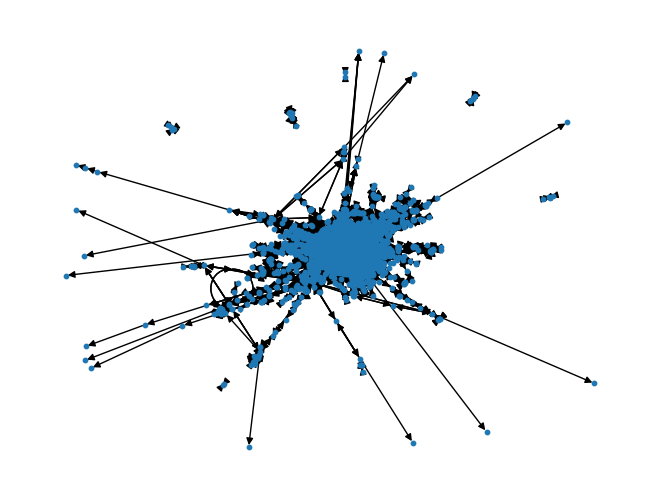

In [80]:
nx.circular_layout(g)
nx.draw(g, with_labels=False, node_size=10)

In [59]:
print(nx.average_clustering(g))

0.4917731731380378
